In [1]:
import numpy as np 
import pandas as pd 


In [2]:
df = pd.read_csv('playstore.csv') 

In [3]:
df.head()

,app,category,rating,review,size,type,installs,price,content_rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,Free,10000,0,Everyone
1,Coloring book moana,FAMILY,3.9,974,14,Free,500000,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,Free,5000000,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,Free,50000000,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2,Free,100000,0,Everyone


In [4]:
for i in df['app']:
    if (i=='Nan'):
        print(i)

In [5]:
df.isnull().sum()

app               0
category          0
rating            0
review            0
size              0
type              0
installs          0
price             0
content_rating    0
dtype: int64

In [6]:
# what is custom Dataframes?

# list top 10 apps based on their reviews with category Family

In [7]:
lis = []
for i in df.values:
    if i[1] == 'FAMILY':
        lis.append([i[0],i[7]])
df_pr = pd.DataFrame(lis,columns=['apps','review'])


In [8]:
df_pr.sort_values(by = 'review', ascending = False).head(10)

,apps,review
573,I Am Rich Pro,29999
313,most expensive app (H),29999
572,I am Rich Plus,29999
574,I Am Rich,29249
884,Dr.Dice - Sic bo analyzer,3524
308,Norwegian For Kids & Babies F,2999
621,AP Art History Flashcards,2249
1363,DRAGON QUEST VIII,1499
1085,USMLE Step 2 CK Flashcards,1499
1059,boattheory.ch Full 2018,1455


# 2) list top 5 most expensive apps in art and design 

In [9]:
lis = []
for i in df.values:
    if i[1] == 'ART_AND_DESIGN':
        lis.append([i[0],i[3]])
df_pr2 = pd.DataFrame(lis,columns=['apps','price'])


In [10]:
df_pr2.sort_values(by = 'price',ascending = False).head(10)

,apps,price
38,Textgram - write on photos,295237
17,ibis Paint X,224399
2,Sketch - Draw & Paint,215644
16,FlipaClip - Cartoon animation,194216
41,"Canva: Poster, banner, card maker & graphic de...",174531
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510
11,Tattoo Name On My Photo Editor,44829
6,Infinite Painter,36815
33,Floor Plan Creator,36639
23,Colorfit - Drawing & Coloring,20260


# 3) average price of an application in art and design 

In [11]:
lis = []
for i in df.values:
    if i[1] == 'ART_AND_DESIGN':
        lis.append([i[0],i[3]])
df_pr = pd.DataFrame(lis,columns=['apps','price'])
df_pr['price'].mean()


23499.85

# 4) Average price of in every content rating 

In [12]:
df['content_rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [13]:
lis = []
for name in df['content_rating'].unique():
    for i in df.values:
        if i[8] == name:
            lis.append([i[0],i[7]])
    df_pr = pd.DataFrame(lis,columns=['content_rating','price'])
    print(name,':',int(df_pr['price'].mean()))


Everyone : 92
Teen : 86
Everyone 10+ : 85
Mature 17+ : 82
Adults only 18+ : 82
Unrated : 82


# 5) Average price of application in each category

In [14]:
for name in df['category'].unique():
    lis = []
    for i in df.values:
        if i[1] == name:
            lis.append([i[0],i[7]])
    df_pr = pd.DataFrame(lis,columns=['category','price'])
print(name,':',int(df_pr['price'].mean()))


MAPS_AND_NAVIGATION : 15


# 6) sort the categories based on their average price of application

In [16]:
data = []
for name in df['category'].unique():
    lis = []
    for i in df.values:
        if i[1] == name:
            lis.append([i[0],i[7]])
    df_pr = pd.DataFrame(lis,columns=['category','price'])
    data.append([name,int(df_pr['price'].mean())])
df_pr = pd.DataFrame(data,columns = ['name','price'])

In [17]:
df_pr.sort_values(by='price',ascending = False).head(10)

,name,price
13,FINANCE,630
19,LIFESTYLE,479
16,MEDICAL,186
12,EVENTS,128
1,FAMILY,94
28,PRODUCTIVITY,50
4,BOOKS_AND_REFERENCE,40
5,BUSINESS,31
25,PHOTOGRAPHY,31
30,WEATHER,30


In [18]:
# 7. Ratio of free vs paid apps in each content rating 

In [51]:
for name in df['content_rating'].unique():
    f = 0
    p = 0
    for i in df.values:
        if (i[8] == name):
            if  (i[5] == 'Free'):
                f += 1
            else:
                p += 1
                
    print(name,':',int(f/(f+p)*100))

Everyone : 91
Teen : 94
Everyone 10+ : 90
Mature 17+ : 95
Adults only 18+ : 100
Unrated : 100


In [19]:
# 8. ratio of free vs paid apps in each category 

In [53]:
for cats in df['category'].unique():
    f = 0
    p = 0
    for i in df.values:
        if (i[1] == cats):
            if  (i[5] == 'Free'):
                f += 1
            else:
                p += 1
                
    print(cats,':',int(f/(f+p)*100))

ART_AND_DESIGN : 95
FAMILY : 90
AUTO_AND_VEHICLES : 96
BEAUTY : 100
BOOKS_AND_REFERENCE : 87
BUSINESS : 97
COMMUNICATION : 91
COMICS : 100
DATING : 97
TOOLS : 90
EDUCATION : 98
ENTERTAINMENT : 97
EVENTS : 98
FINANCE : 95
FOOD_AND_DRINK : 98
HEALTH_AND_FITNESS : 94
MEDICAL : 79
HOUSE_AND_HOME : 100
LIBRARIES_AND_DEMO : 98
LIFESTYLE : 94
GAME : 91
SPORTS : 92
VIDEO_PLAYERS : 97
SOCIAL : 98
SHOPPING : 99
PHOTOGRAPHY : 93
TRAVEL_AND_LOCAL : 94
PERSONALIZATION : 78
PRODUCTIVITY : 92
PARENTING : 96
WEATHER : 89
NEWS_AND_MAGAZINES : 99
MAPS_AND_NAVIGATION : 96


In [20]:
#9. top 5 categories in terms of free vs paid app ratio 

In [54]:
categories = []
for cats in df['category'].unique():
    f = 0
    p = 0
    for i in df.values:
        if (i[1] == cats):
            if  (i[5] == 'Free'):
                f += 1
            else:
                p += 1
                
    categories.append([cats,int(f/(f+p)*100)])
    
categories =pd.DataFrame(categories,columns =['category','ratio'])
categories.sort_values(by='ratio',ascending = False).head()

,category,ratio
3,BEAUTY,100
7,COMICS,100
17,HOUSE_AND_HOME,100
31,NEWS_AND_MAGAZINES,99
24,SHOPPING,99


In [21]:
# 10. frequency of apps in each rating 

In [61]:
for ratings in df['rating'].unique():
    count = 0
    for i in df.values:
        if i[2] == ratings:
            count += 1
    print(ratings,':',count)

4.1 : 622
3.9 : 359
4.7 : 438
4.5 : 849
4.3 : 896
4.4 : 2352
3.8 : 287
4.2 : 811
4.6 : 683
4.0 : 511
4.8 : 220
4.9 : 86
3.6 : 167
3.7 : 224
3.2 : 62
3.3 : 100
3.4 : 126
3.5 : 156
3.1 : 69
5.0 : 271
3.0 : 81
1.9 : 11
2.5 : 20
2.8 : 40
2.7 : 23
1.0 : 16
2.9 : 45
2.6 : 23
2.3 : 20
2.2 : 14
1.7 : 8
2.0 : 12
1.8 : 8
2.4 : 19
1.6 : 4
2.1 : 8
1.4 : 3
1.5 : 3
1.2 : 1


In [22]:
# 11. frequency of apps in each rating sorted order by rating 

In [72]:
rating = []

for ratings in df['rating'].unique():
    count = 0
    for i in df.values:
        if i[2] == ratings:
            count += 1
    rating.append([ratings,count])

rating =pd.DataFrame(rating,columns =['ratings','freq'])
rating.sort_values(by='ratings',ascending=False).head()

,ratings,freq
19,5.0,271
11,4.9,86
10,4.8,220
2,4.7,438
8,4.6,683


<AxesSubplot:>

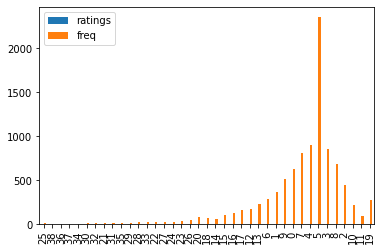

In [71]:
rating.sort_values(by='ratings',ascending = True).plot(kind='bar')